## [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/post/304214/ 'habr')

Метод Главных Компонент (англ. Principal Components Analysis, PCA)

In [409]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
## визуализируем
def plot_it(X):
    f, ax = plt.subplots(figsize=(12,8))
    ax.scatter(X[0], X[1], marker = 'o', s = 100, c = 'r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('some data')
    ax.grid()
    plt.show()

In [410]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 0.35218837,  5.25917904,  9.5704868 ,  6.6457429 ,  9.91240769,
        13.31069173, 10.51270999, 16.85032945, 18.66666788, 21.14057373]])

In [411]:
X[1] = [2.37909352,  2.49708   ,  5.89239159,  8.25830449, 11.83566832,
        11.40966979, 12.69153524, 17.83112076, 15.03994232, 20.42055243]
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 2.37909352,  2.49708   ,  5.89239159,  8.25830449, 11.83566832,
        11.40966979, 12.69153524, 17.83112076, 15.03994232, 20.42055243]])

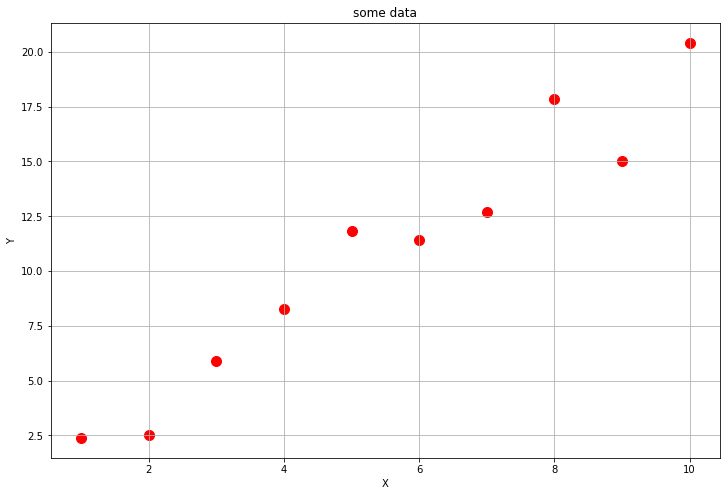

In [412]:
plot_it(X)

In [413]:
Xcentered = (X[0] - X[0].mean(), X[1] - X[1].mean())
m = (X[0].mean(), X[1].mean())
m

(5.5, 10.825535846)

In [422]:
Xcentered

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 array([-8.44644233, -8.32845585, -4.93314426, -2.56723136,  1.01013247,
         0.58413394,  1.86599939,  7.00558491,  4.21440647,  9.59501658]))

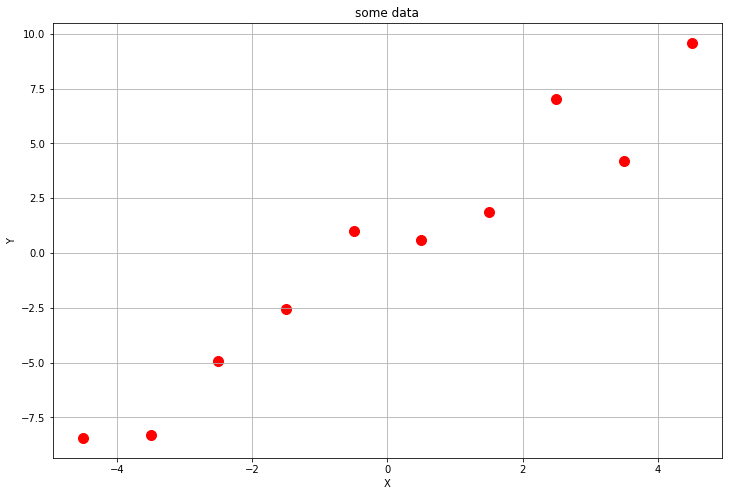

In [415]:
plot_it(Xcentered)

In [416]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print( "Variance of X: ", np.cov(Xcentered)[0,0])
print( "Variance of Y: ", np.cov(Xcentered)[1,1])
print( "Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 17.93002811]
 [17.93002811 37.26438587]] 

Variance of X:  9.166666666666666
Variance of Y:  37.264385867946054
Covariance X and Y:  17.93002811111111


In [423]:
Var_x = np.cov(Xcentered)[0,0]
Var_y = np.cov(Xcentered)[1,1]
Var_x + Var_y

46.43105253461272

In [418]:
eigenvalues, vecs = np.linalg.eig(covmat)
v = -(vecs[:,1])
Xnew = np.dot(v,Xcentered)
print(Xnew)

[-9.56404106 -9.02021625 -5.52974822 -2.96481262  0.68933859  0.74406645
  2.33433492  7.39307974  5.3212742  10.59672425]


In [419]:
eigenvalues

array([ 0.43710744, 45.99394509])

In [450]:
np.sum(eigenvalues) == Var_y+Var_x

True

In [429]:
str(np.round((1 - np.max(eigenvalues)/(Var_y+Var_x))*100,1))+'% процент потерь информации'

'0.9% процент потерь информации'

In [445]:
np.max(eigenvalues)/(Var_y+Var_x)

0.9905858812376908

## Шаг 5. Восстановление данных

In [433]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [10.1386436  20.35305128]
Original:  [10.         20.42055243]


In [435]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет. Другими словами – это n айгенвекторов с самыми большими собственными числами. Проверим результат снижения размерности:

In [437]:
print('Our reduced X: \n', Xnew)
print('Sklearn reduced X: \n', XPCAreduced)

Our reduced X: 
 [array([-9.56404106, -9.02021625, -5.52974822, -2.96481262,  0.68933859,
        0.74406645,  2.33433492,  7.39307974,  5.3212742 , 10.59672425])]
Sklearn reduced X: 
 [[-9.56404106]
 [-9.02021625]
 [-5.52974822]
 [-2.96481262]
 [ 0.68933859]
 [ 0.74406645]
 [ 2.33433492]
 [ 7.39307974]
 [ 5.3212742 ]
 [10.59672425]]


Проверим и прочие параметры модели – функция имеет ряд атрибутов, позволяющих получить доступ к промежуточным переменным:

- Вектор средних: mean_
- Вектор(матрица) проекции: components_
- Дисперсии осей проекции (выборочная): explained_variance_
- Доля информации (доля от общей дисперсии): explained_variance_ratio_

Замечание: explained_variance_ показывает выборочную дисперсию, тогда как функция cov() для построения ковариационной матрицы рассчитывает несмещенные дисперсии!

In [447]:
print('Mean vector: ', pca.mean_, m)
print('Projection: ', pca.components_, v)
print('Explained variance ratio: ', pca.explained_variance_ratio_, np.max(eigenvalues)/(np.sum(eigenvalues)))

Mean vector:  [ 5.5        10.82553585] (5.5, 10.825535846)
Projection:  [[0.43774316 0.89910006]] [0.43774316 0.89910006]
Explained variance ratio:  [0.99058588] 0.9905858812376908
